# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Nurul Fatwa Al Fajar
- **Email:** arulkece50@gmail.com
- **ID Dicoding:** MC009D5Y0699

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

- Pertanyaan 2 : pada jam berapa penyewaan sepeda paling banyak dilakukan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/DcCode46/dicoding/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/DcCode46/dicoding/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi data harian dengan 731 entri.
- hour.csv berisi data per jam dengan 17.379 entri.
- Kolom yang tersedia mencakup informasi tentang musim, hari kerja, cuaca, suhu, kelembaban, kecepatan angin, serta jumlah penyewa (baik casual maupun registered).
- hr (jam) hanya ada di hour.csv, sesuai dengan format data per jam.

### Assessing Data

#### **Menilai tabel day_df**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("\nPreview Dataset day_df: ")
print(day_df.head())


Preview Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [7]:
print("\nCek Data Hilang dalam Dataset day_df: ")
print(day_df.isna().sum())


Cek Data Hilang dalam Dataset day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Menilai tabel hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("\nPreview Dataset hour_df: ")
print(hour_df.head())


Preview Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [10]:
print("\nCek Data Hilang dalam Dataset hour_df: ")
print(hour_df.isna().sum())


Cek Data Hilang dalam Dataset hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada data yang hilang dalam kedua dataset (day.csv dan hour.csv).
Kolom dteday masih dalam format object (string), sebaiknya diubah menjadi format datetime.
- Semua kolom lainnya memiliki tipe data yang sesuai dengan nilai yang disimpan (integer dan float).

### Cleaning Data

#### Membersihkan day_df

##### Mengecek Duplicate data

In [11]:
print("\nJumlah Data Duplikat dalam Dataset day_df: ", day_df.duplicated().sum())


Jumlah Data Duplikat dalam Dataset day_df:  0


##### Missing Value

In [12]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Membersihkan hour_df

##### Duplicate data

In [13]:
print("\nJumlah Data Duplikat dalam Dataset hour_df: ", hour_df.duplicated().sum())


Jumlah Data Duplikat dalam Dataset hour_df:  0


##### Missing value

In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Kedua data set bersih dan tidak ada yang perlu di cleaning.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
399,400,2012-02-04,1,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832
668,669,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
495,496,2012-05-10,2,1,5,0,4,1,1,0.505833,0.491783,0.552083,0.314063,1026,5546,6572
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436
580,581,2012-08-03,3,1,8,0,5,1,2,0.765833,0.722867,0.642500,0.215792,1328,5847,7175


### Explore hour-df

In [16]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16854,16855,2012-12-10,4,1,12,1,0,1,1,2,0.36,0.3788,1.00,0.0000,0,4,4
16975,16976,2012-12-15,4,1,12,2,0,6,0,1,0.26,0.3030,0.81,0.0000,6,63,69
1322,1323,2011-02-28,1,0,2,9,0,1,1,1,0.42,0.4242,0.82,0.2836,15,127,142
8024,8025,2011-12-06,4,0,12,0,0,2,1,2,0.50,0.4848,0.77,0.2985,3,25,28
15832,15833,2012-10-26,4,1,10,21,0,5,1,2,0.54,0.5152,0.77,0.1343,40,252,292


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-18-5a536bcf50d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')


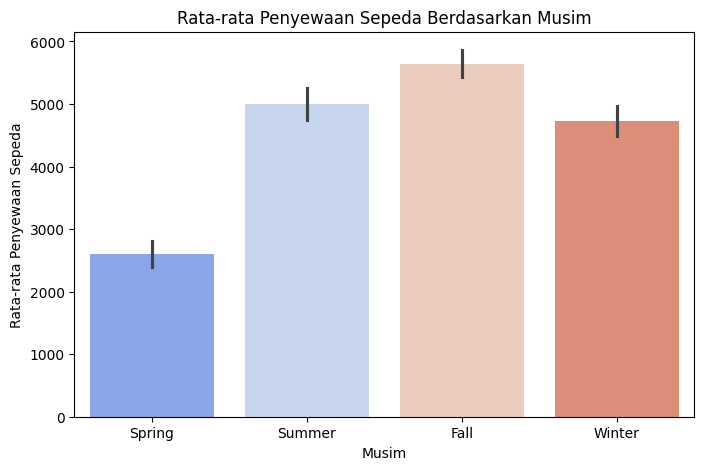

In [18]:
def plot_rentals_by_season(df):
    plt.figure(figsize=(8,5))
    sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')
    plt.xlabel('Musim')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    plt.show()

plot_rentals_by_season(day_df)

### Pertanyaan 2:

<ipython-input-19-c0a8e27bd68d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette='Set2')


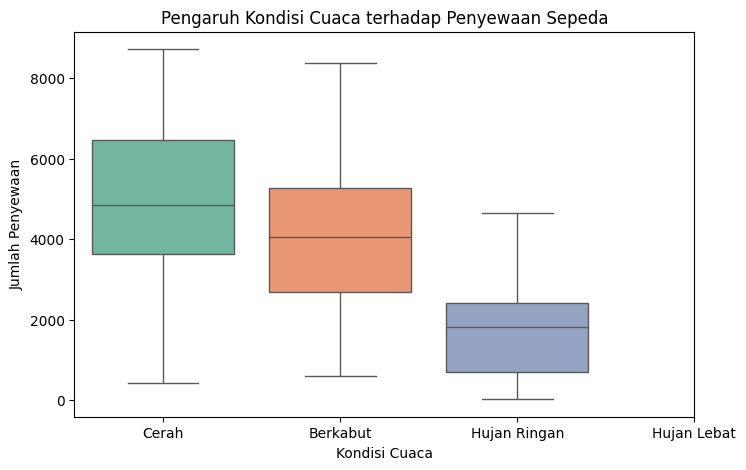

In [19]:
def plot_weather_effect(df):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='weathersit', y='cnt', data=df, palette='Set2')
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
    plt.show()

plot_weather_effect(day_df)

## Conclusion

- Penyewaan sepeda cenderung lebih tinggi pada musim gugur dan lebih rendah di musim semi.
- Kondisi cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda, sedangkan hujan lebat menguranginya secara signifikan.